<a href="https://colab.research.google.com/github/lovely0823/fer/blob/master/DemoEmotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FER .ipynb implementation
In this notebook file you can try the Facial expression recognition module.

[You can find the project here](https://github.com/justinshenk/fer)

This Notebook is focused on Video prediction in the cloud with Google Colaboratory GPU.

Ensure that you enable the Free GPU in Colab, and check it with the next cell.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q fer
!pip install  tensorflow==2.2.0

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

     |████████████████████████████████| 812 kB 5.2 MB/s 
     |████████████████████████████████| 2.3 MB 39.7 MB/s 
     |████████████████████████████████| 516.2 MB 4.6 kB/s 
     |████████████████████████████████| 454 kB 44.7 MB/s 
     |████████████████████████████████| 3.0 MB 36.5 MB/s 
     |████████████████████████████████| 2.9 MB 36.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninsta

In [ ]:
# Upload your file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving short_sample.mp4 to short_sample.mp4
User uploaded file "short_sample.mp4" with length 3959798 bytes


In [ ]:
%matplotlib inline
from fer import Video
from fer import FER
import matplotlib.pyplot as plt
import os
import sys
import cv2

vidcap = cv2.VideoCapture(fn)
success, image = vidcap.read()
count = 0
while success:
  cv2.imwrite("/content/drive/MyDrive/Thesis_FER/frame%d.jpg" % count, image)
  success, image = vidcap.read()
  count += 1


# fn contains the video file name (Ensure that you only upload one file)
# videofile = fn
# Face detection
# detector = FER(mtcnn=True)
# Video predictions
# video = Video(videofile)

# Output list of dictionaries
# raw_data = video.analyze(detector, display=False)

In [ ]:
from fer import FER
import cv2
import pandas as pd


img = cv2.imread("/content/drive/MyDrive/Thesis_FER/frame0.jpg")
detector = FER()
result_dict = detector.detect_emotions(img)
result_dict
result_df = pd.DataFrame(result_dict)
result_df
# result_df2 = pd.DataFrame(result_df['emotions'].str.split(', ').tolist(),columns=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
# result_df2




ValueError: ignored

In [ ]:
# import codecs

folder = "/content/drive/MyDrive/Thesis_FER"

for filename in os.listdir(folder):
  path = os.path.join(folder, filename)
  with open(path, 'rb') as f:

    file = f.read()
    detector = FER()
    result_dict = detector.detect_emotions(path)
    result_df = pd.DataFrame(result_dict)
    result_df


ValueError: ignored

In [ ]:
import pandas as pd

resultDF = pd.DataFrame(result)
filename = "frame0.jpg"

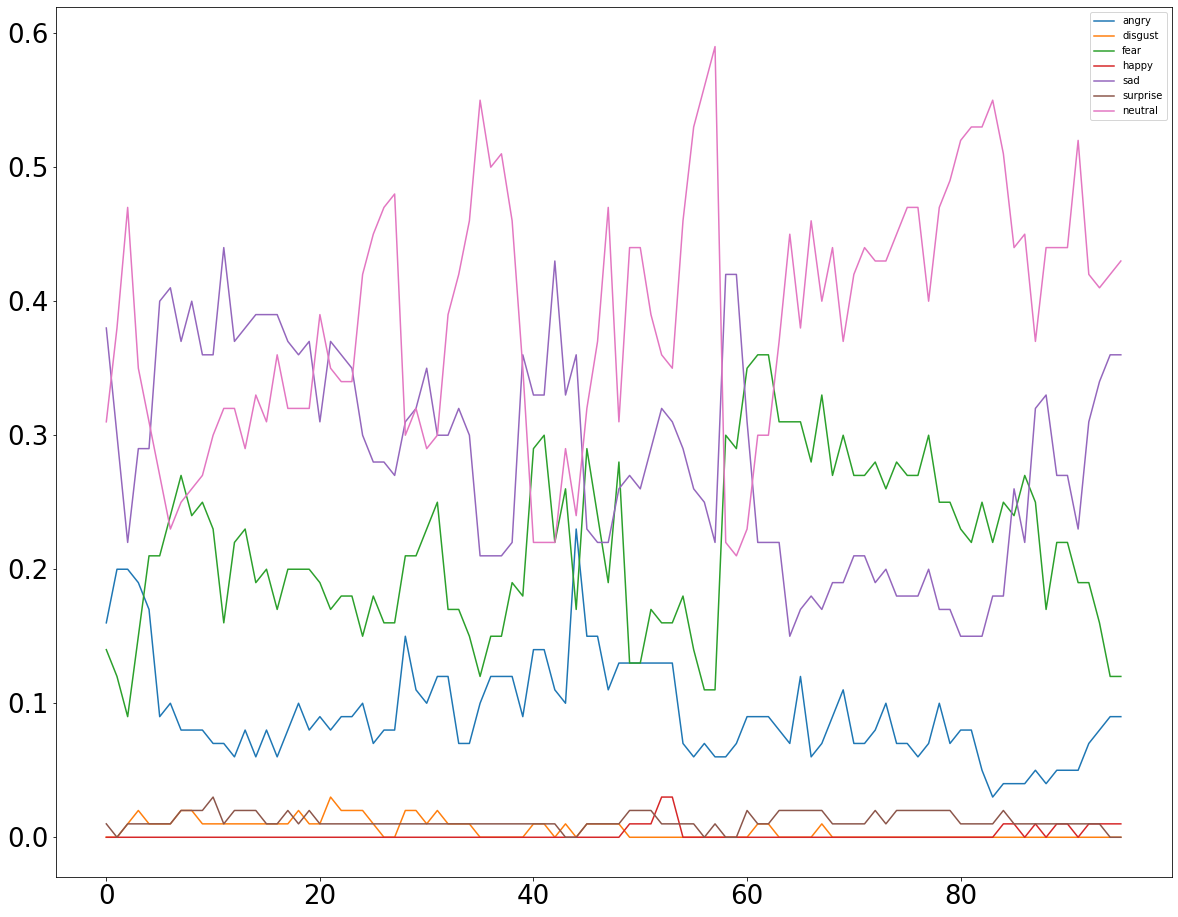

In [ ]:
# Convert to pandas for analysis
df = video.to_pandas(raw_data)
df = video.get_first_face(df)
df = video.get_emotions(df)

# Plot emotions
fig = df.plot(figsize=(20, 16), fontsize=26).get_figure()
# Filename for plot
fig.savefig('my_figure.png')

In [ ]:
df['timestamp'] = df.index
df['timestamp'] = df['timestamp'].apply(lambda x: x/fps)

In [ ]:
df

,angry,disgust,fear,happy,sad,surprise,neutral,timestamp
0,0.16,0.00,0.14,0.00,0.38,0.01,0.31,0.000000
1,0.20,0.00,0.12,0.00,0.30,0.00,0.38,0.033333
2,0.20,0.01,0.09,0.00,0.22,0.01,0.47,0.066667
3,0.19,0.02,0.15,0.00,0.29,0.01,0.35,0.100000
4,0.17,0.01,0.21,0.00,0.29,0.01,0.31,0.133333
...,...,...,...,...,...,...,...,...
91,0.05,0.00,0.19,0.00,0.23,0.01,0.52,3.033333
92,0.07,0.00,0.19,0.01,0.31,0.01,0.42,3.066667
93,0.08,0.00,0.16,0.01,0.34,0.01,0.41,3.100000
94,0.09,0.00,0.12,0.01,0.36,0.00,0.42,3.133333


In [ ]:
df.to_csv('emotion_data.csv')